In [14]:
# Import the libraries we will be using
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#from dstools import data_tools   #if plot decision tree surface

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

In [13]:
df = pd.read_pickle('../data_processeing/Yelp_Cuisine_Chinese.pkl')
print df.shape
df.head(2)

(27314, 98)


,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,...,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi,cuisine_Chinese
EDqCEAGXVGCH4FJXgqtjqg,979 Bloor Street W,"[{u'Alcohol': u'none'}, {u'Ambience': {u'roman...",EDqCEAGXVGCH4FJXgqtjqg,"[Restaurants, Pizza, Chicken Wings, Italian]",Toronto,"[Monday 11:0-2:0, Tuesday 11:0-2:0, Wednesday ...",1,43.661054,-79.429089,Pizza Pizza,...,False,False,NaN,NaN,NaN,NaN,False,NaN,NaN,1
GDnbt3isfhd57T1QqU6flg,11072 No Frank Lloyd Wright,"[{u'Alcohol': u'none'}, {u'Ambience': {u'roman...",GDnbt3isfhd57T1QqU6flg,"[Tex-Mex, Mexican, Fast Food, Restaurants]",Scottsdale,"[Monday 10:0-22:0, Tuesday 10:0-22:0, Wednesda...",1,33.586710,-111.835410,Taco Bell,...,False,False,NaN,NaN,NaN,NaN,False,NaN,NaN,1


In [29]:
#df.review_count.unique()

#### flaten attributes

In [15]:
df2 = df.copy()

In [31]:
df_att = df2.loc[ :, u'AcceptsInsurance':'WiFi'] # include 'WiFi'
att_type = {}
col_b = []
col_m = []
for i in range(df_att.shape[1]):
    temp = df_att.groupby(df_att.iloc[:,i]).size().keys()
    print temp.name, ': ', temp.values
    if set(temp.values) == set([False, True]) or set(temp.values).issubset(set([False, True])):
        att_type[temp.name] = 'b'
        col_b.append(temp.name)
    else:
        att_type[temp.name] = 'm'
        col_m.append(temp.name)

print len(col_b), len(col_m)
col_all = col_b + col_m

AcceptsInsurance :  [False True]
AgesAllowed :  [False True]
Alcohol :  [False True]
Ambience_casual :  [False True]
Ambience_classy :  ['beer_and_wine' 'full_bar' 'none']
Ambience_divey :  [False True]
Ambience_hipster :  ['average' 'loud' 'quiet' 'very_loud']
Ambience_intimate :  [False True]
Ambience_romantic :  ['casual' 'dressy' 'formal']
Ambience_touristy :  [False True]
Ambience_trendy :  [False True]
Ambience_upscale :  [False True]
BYOB :  [False True]
BYOBCorkage :  [False True]
BestNights_friday :  [False]
BestNights_monday :  [False True]
BestNights_saturday :  [False True]
BestNights_sunday :  [False True]
BestNights_thursday :  [False 'yes_corkage' 'yes_free']
BestNights_tuesday :  [False True]
BestNights_wednesday :  [False True]
BikeParking :  [False True]
BusinessAcceptsBitcoin :  [False True]
BusinessAcceptsCreditCards :  [False True]
BusinessParking_garage :  [False True]
BusinessParking_lot :  [False 'free' 'paid']
BusinessParking_street :  [False True]
BusinessPark

In [35]:
### join label with all the expanded"attributes" and "review count"
df_att_b = df2.loc[:,col_b].join(df[['review_count','cuisine_Chinese']])
df_att_b.head(1)

,AcceptsInsurance,AgesAllowed,Alcohol,Ambience_casual,Ambience_divey,Ambience_intimate,Ambience_touristy,Ambience_trendy,Ambience_upscale,BYOB,...,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi,review_count,cuisine_Chinese
EDqCEAGXVGCH4FJXgqtjqg,NaN,False,NaN,NaN,True,NaN,NaN,NaN,True,False,...,False,False,NaN,NaN,NaN,False,NaN,NaN,7,1


In [36]:
df_att_m = df2.loc[:,col_m].join(df[['review_count','cuisine_Chinese']])
df_att_m.head(1)

,Ambience_classy,Ambience_hipster,Ambience_romantic,BestNights_thursday,BusinessParking_lot,HairSpecializesIn_kids,HairSpecializesIn_perms,RestaurantsReservations,review_count,cuisine_Chinese
EDqCEAGXVGCH4FJXgqtjqg,none,quiet,casual,NaN,free,1,NaN,NaN,7,1


In [37]:
df_att_all = df_att.join(df[['review_count','cuisine_Chinese']])
df_att_all.head(1)

,AcceptsInsurance,AgesAllowed,Alcohol,Ambience_casual,Ambience_classy,Ambience_divey,Ambience_hipster,Ambience_intimate,Ambience_romantic,Ambience_touristy,...,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi,review_count,cuisine_Chinese
EDqCEAGXVGCH4FJXgqtjqg,NaN,False,NaN,NaN,none,True,quiet,NaN,casual,NaN,...,False,NaN,NaN,NaN,NaN,False,NaN,NaN,7,1


In [38]:
df_att_all.shape

(27314, 83)

In [39]:
df_att_all_filled = df_att_all.fillna(value='none')
df_att_all_filled.head(3)

,AcceptsInsurance,AgesAllowed,Alcohol,Ambience_casual,Ambience_classy,Ambience_divey,Ambience_hipster,Ambience_intimate,Ambience_romantic,Ambience_touristy,...,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi,review_count,cuisine_Chinese
EDqCEAGXVGCH4FJXgqtjqg,none,False,none,none,none,True,quiet,none,casual,none,...,False,none,none,none,none,False,none,none,7,1
GDnbt3isfhd57T1QqU6flg,none,False,none,none,none,False,quiet,none,casual,none,...,False,none,none,none,none,False,none,none,9,1
a1Ba6XeIOP48e64YFD0dMw,none,none,none,none,none,none,none,none,none,none,...,none,none,none,none,none,none,none,none,3,0


In [45]:
## transformed certain columns to BINARY varibales #####
df_chin_bi = pd.get_dummies(df_att_all_filled, \
                            prefix=col_all, prefix_sep='_', dummy_na=False, \
                            columns=col_all, sparse=False, drop_first=False)

In [56]:
## change column order
df_chin_bi = df_chin_bi.loc[:,['cuisine_Chinese','review_count'] + list(df_chin_bi.columns.values[2:])]

In [57]:
df_chin_bi.head(2)

,cuisine_Chinese,review_count,AcceptsInsurance_False,AcceptsInsurance_True,AcceptsInsurance_none,AgesAllowed_False,AgesAllowed_True,AgesAllowed_none,Alcohol_False,Alcohol_True,...,HairSpecializesIn_kids_none,HairSpecializesIn_perms_18plus,HairSpecializesIn_perms_19plus,HairSpecializesIn_perms_21plus,HairSpecializesIn_perms_allages,HairSpecializesIn_perms_none,RestaurantsReservations_False,RestaurantsReservations_True,RestaurantsReservations_none,RestaurantsReservations_outdoor
EDqCEAGXVGCH4FJXgqtjqg,1,7,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
GDnbt3isfhd57T1QqU6flg,1,9,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [58]:
df_chin_bi.shape

(27314, 254)

In [59]:
# Split training(labeled) and test(unlabled) 
df_chin_train = df_chin_bi[df_chin_bi['cuisine_Chinese'] != 0]
df_chin_test = df_chin_bi[df_chin_bi['cuisine_Chinese'] == 0]

## Logistic Regression

#### Parameter tuning

In [61]:
# panalty and C value tuning
penalties = ['l1', 'l2'] 
C_values = sorted([np.exp(a*5) for a in np.linspace(-8,4,20)])
C_values

[4.2483542552915889e-18,
 9.9925650127909073e-17,
 2.3503537966609349e-15,
 5.5282732335564566e-14,
 1.30030657462187e-12,
 3.0584544514583164e-11,
 7.1937986119660656e-10,
 1.6920552289032579e-08,
 3.9798874726580644e-07,
 9.3611036001982535e-06,
 0.00022018275947666106,
 0.0051789243705977379,
 0.12181361383661964,
 2.8651811561836724,
 67.391999951340196,
 1585.128970864379,
 37283.859450495467,
 876954.62077529205,
 20626872.27754036,
 485165195.40979028]

In [ ]:
# dummy varibale

In [78]:
X = df_chin_train.ix[:, 1:]
Y = df_chin_train['cuisine_Chinese'].apply(lambda n: n-1)

In [79]:
Y.unique()

array([0, 1])

In [80]:
# pick train test split ratio as 0.7

# LR GridSearch 1
X_train, X_vali, Y_train, Y_vali = train_test_split(
    X, Y, train_size=0.7, random_state=90) #Use random_state to fix samples

# tuning hyper parameter
tuned_parameters_LR = {'C': C_values,
                       'penalty': penalties} 

lr = LogisticRegression()
gr_lr = GridSearchCV(lr, param_grid=tuned_parameters_LR, cv=5)
gr_lr.fit(X_train, Y_train)

gr_lr_auc_scores = cross_val_score(gr_lr, X, Y, scoring="roc_auc", cv=5)

print ( "Logistic regression training size(0.8): Mean AUC %.4f\n" % (np.mean(gr_lr_auc_scores)))

print "Best parameters set found:"
print gr_lr.best_params_
print"Gridsearch Scores: "
print gr_lr.score(X_vali, Y_vali)

means = gr_lr.cv_results_['mean_test_score']
stds = gr_lr.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gr_lr.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Logistic regression training size(0.8): Mean AUC 0.7488

Best parameters set found:
{'penalty': 'l1', 'C': 2.8651811561836724}
Gridsearch Scores: 
0.864946084497
0.855 (+/-0.000) for {'penalty': 'l1', 'C': 4.2483542552915889e-18}
0.855 (+/-0.000) for {'penalty': 'l2', 'C': 4.2483542552915889e-18}
0.855 (+/-0.000) for {'penalty': 'l1', 'C': 9.9925650127909073e-17}
0.855 (+/-0.000) for {'penalty': 'l2', 'C': 9.9925650127909073e-17}
0.855 (+/-0.000) for {'penalty': 'l1', 'C': 2.3503537966609349e-15}
0.855 (+/-0.000) for {'penalty': 'l2', 'C': 2.3503537966609349e-15}
0.855 (+/-0.000) for {'penalty': 'l1', 'C': 5.5282732335564566e-14}
0.855 (+/-0.000) for {'penalty': 'l2', 'C': 5.5282732335564566e-14}
0.855 (+/-0.000) for {'penalty': 'l1', 'C': 1.30030657462187e-12}
0.855 (+/-0.000) for {'penalty': 'l2', 'C': 1.30030657462187e-12}
0.855 (+/-0.000) for {'penalty': 'l1', 'C': 3.0584544514583164e-11}
0.855 (+/-0.000) for {'penalty': 'l2', 'C': 3.0584544514583164e-11}
0.855 (+/-0.000) for {'pen

In [81]:
p_opt = gr_lr.best_params_.values()[0]
c_opt = gr_lr.best_params_.values()[1]

In [91]:
models = []
labels = []

# fit model
lr_opt = LogisticRegression(C=c_opt, penalty=p_opt, random_state=99)
lr_opt.fit(X_train, Y_train)
models.append(lr_opt)
labels.append('Logistic Regression')

In [92]:
lr_opt

LogisticRegression(C=2.8651811561836724, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=99,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 6, 6

#### Plot One model - train & validation sets ####
def plot_ROC(model, Y_train, X_train, Y_vali, X_vali, label):
    print ("AUC on the %s Train data = %.5f" % \
           (label, metrics.roc_auc_score(model.predict(X_train), Y_train)))
    print ("AUC on the %s Validation data = %.5f\n" % \
           (label, metrics.roc_auc_score(model.predict(X_vali), Y_vali)))

    #fpr, tpr, thresholds = metrics.roc_curve(Y_train, model.predict_proba(X_train)[:,1])    
    #plt.plot(fpr, tpr, label='{} Train set'.format(label))
    
    fpr, tpr, thresholds = metrics.roc_curve(Y_vali, model.predict_proba(X_vali)[:,1])    
    plt.plot(fpr, tpr, label='{} Validation set'.format(label))
    
    plt.xlabel("false-positive rate", size=18)
    plt.ylabel("true-positibe rate", size=18)
    plt.title("ROC Curve of {} Model".format(label), size=20)
    plt.legend(loc='best')

    
### more than one model - validation sets ###
def plot_ROCs(models, Y_trains, X_trains, Y_valis, X_valis, labels):  
    for model, Y_train, X_train, Y_vali, X_vali, label in \
    zip(models, Y_trains, X_trains, Y_valis, X_valis, labels):
        
        print ("AUC on the %s Train data = %.5f" % \
               (label, metrics.roc_auc_score(model.predict(X_train), Y_train)))
        print ("AUC on the %s Validation data = %.5f\n" % \
               (label, metrics.roc_auc_score(model.predict(X_vali), Y_vali)))
        
        fpr, tpr, thresholds = metrics.roc_curve(Y_vali, model.predict_proba(X_vali)[:,1])
        plt.plot(fpr, tpr, label=label)
    
    plt.xlabel("fpr", size=18)
    plt.ylabel("tpr", size=18)
    plt.title("ROC Curves for models and transformed X sets", size=20)
    plt.legend(loc='best')


AUC on the LR Train data = 0.72826
AUC on the LR Validation data = 0.76676



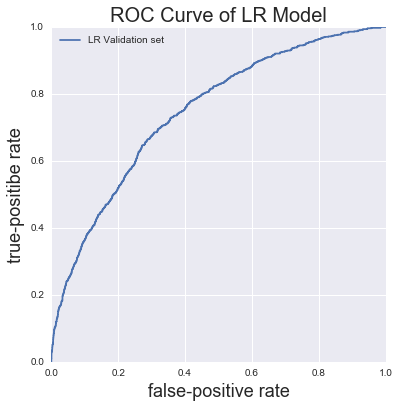

In [121]:
plot_ROC(lr_opt, Y_train, X_train, Y_vali, X_vali, label='LR')